<h1><center>Premier League 2020/21 - Data Analysis</center></h1>
<hr>

### Réalisé Par:
* Bouaskaoun Mohammed
* Bentaleb Saad

<p><center><img src="https://www.insidesport.in/wp-content/uploads/2021/08/skysports-grpahic-graphic-premier-league_5415970.png?w=1024&h=1&crop=1" alt="English_PremierLeague_Analysis"/></center></p>

## Introduction
Exploratory Data Analysis (EDA) was originally developed by an American mathematician called John Tukey in the 1970s. It is widely used today in the data discovery process. Exploring data and gaining insights is fundamental in understanding the data before performing any Machine Learning tasks. EDA refers to the critical process of performing an initial investigation on data to discover patterns, spot anomalies/errors, test a hypothesis, or check assumptions with the help of summary statistics or graphical representations. Graphical techniques used in EDA include plotting the raw data (such as histograms, probability plots, block plots), and plotting simple statistics such as mean plots, box plots etc. This provides a solid understanding of the dataset variables and the relationship between them. In this article, we will have an understanding of EDA process with the help of the English Premier League 2020-21 season dataset.

## Description of Features
The table shows a short description of each EPL dataset feature:

| Feature | Description |
| --- | --- |
| Name | Name of the player |
| Club | Club of the player |
| Nationality | Country origin of the player |
| Position | Position for which the player plays |
| Age | Age of player |
| Matches | Number of matches played |
| Starts | Number of times the player was in the starting lineup of the match |
| Mins | Number of minutes the player played overall |
| Goals | Number of goals scored by the player |
| Assists | Number of assists given by the player |
| Passes_Attempted | The number of passes attempted by the player |
| Perc_Passes_Completed | The number of passes that the player accurately passed to his teammate |
| Penalty_Goals | Total penalty goals scored by a player |
| Penalty_Attempted | Total penalties taken by a player |
| xG (Expected Goal) | The probability of a shot likely to be converted into a goal. The closer the shot is to the goal, the higher is the xG |
| xA (Expected Assist) | The probability of a pass being a goal assist |
| Yellow_Cards | Total number of yellow cards accrued by a player |
| Red_Cards | Total number of red cards accrued by a player |

## Questions
1. comment l'âge d'un joueur affecte-t-il sa valeur sur le marché ( aussi son performance)?
2. joueurs de quelle région sont les plus susceptibles de signer un grand club ?
3. est-ce qu'être un joueur célèbre signifie toujours être performent ( dans les grandes clubes ) ?
4. quel est l'âge des meilleures performances à chaque poste ?
5. quels sont les meilleurs choix (par rapport au prix) pour un débutant en fantasy qui sont le plus susceptibles de gagner un maximum de points de performance ?
7. pour répondre à ces questions, nous pouvons utiliser anova et ACP ou ACF , nous pouvons également utiliser la classification et d'autres techniques.

## Méthodes d'analyse des données
Le présent rapport contient les méthodes d'analyse des données suivantes:
- ANOVA
- Regression Lineare
- ACP
- Classification héarchique

## Libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as stats
import statsmodels.api as sm
import scipy.cluster.hierarchy as shc
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
epl_df = pd.read_csv('data/EPL_20_21(1).csv')
epl_df

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Clean_Sheet
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,16
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,16
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,16
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,16
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Lys Mousset,Sheffield United,FRA,"FW,MF",24,11,2,296,0,0,50,80.0,0,0,0.22,0.10,0,0,5
528,Jack O'Connell,Sheffield United,ENG,DF,26,2,2,180,0,0,77,77.9,0,0,0.00,0.00,0,0,5
529,Iliman Ndiaye,Sheffield United,FRA,MF,21,1,0,12,0,0,3,100.0,0,0,0.00,0.00,0,0,5
530,Antwoine Hackford,Sheffield United,ENG,"DF,FW",16,1,0,11,0,0,1,100.0,0,0,1.16,0.00,0,0,5


In [4]:
#fixing one position for each player
epl_df["Position"] =  epl_df["Position"].str[:2]

In [90]:
#Ajout des colonnes generee
#
epl_df['MinsPerMatch'] = (epl_df['Mins']/epl_df['Matches']).astype(int)
epl_df['GoalsPerMatch'] = (epl_df['Goals']/epl_df['Matches']).astype(float)
#
epl_df['PointsOfFantasy'] = epl_df['Goals']*4 + epl_df['Assists']*3 + epl_df['Matches']*1 + epl_df['Clean_Sheet']*2 - epl_df['Yellow_Cards'] - epl_df['Red_Cards']*3 -(epl_df['Penalty_Attempted']-epl_df['Penalty_Goals'])*2 + epl_df['Penalty_Goals']
#
Performance_Cat = []
for pts in epl_df["PointsOfFantasy"].astype(int):
    if pts >= 100:
        Performance_Cat.append("Top")
    elif pts >= 50:
        Performance_Cat.append("Avg")
    else:
        Performance_Cat.append("Low")

epl_df["Performance_Cat"] = Performance_Cat
#
local_foreign = []
for nat in epl_df["Nationality"]:
    if nat == 'ENG':
        local_foreign.append("Local")
    else:
        local_foreign.append("Foreign")

epl_df["Local_Foreign"] = local_foreign
#
Age_Cat = []
for cat in epl_df["Age"].astype(int):
    if cat < 20:
        Age_Cat.append("Under20")
    elif cat >= 20 and cat <25:
        Age_Cat.append("20-25")
    elif cat >= 25 and cat <30:
        Age_Cat.append("25-30")
    else:
        Age_Cat.append("Over30")

epl_df["Age_Cat"] = Age_Cat
epl_df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,...,Yellow_Cards,Red_Cards,Clean_Sheet,MinsPerMatch,PointsOfFantasy,Performance_Cat,Local_Foreign,Age_Cat,GoalsPerMatch,xG_Total
0,Mason Mount,Chelsea,ENG,MF,21,36,32,2890,6,5,...,2,0,16,80,106,Top,Local,20-25,0.166667,6.743333
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,...,2,0,16,88,61,Avg,Foreign,25-30,0.000000,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,...,2,0,16,74,113,Top,Foreign,20-25,0.171429,11.853556
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,...,3,0,16,84,83,Avg,Local,20-25,0.111111,2.540000
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,...,3,0,16,74,71,Avg,Local,20-25,0.031250,1.582000


In [6]:
epl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [7]:
epl_df.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Clean_Sheet,MinsPerMatch,PointsOfFantasy
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226,10.077068,63.607143,48.686090
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268,3.431833,25.001879,27.274105
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,9.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,8.000000,49.000000,28.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000,10.000000,71.000000,43.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000,11.000000,84.000000,60.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000,19.000000,90.000000,196.000000


<AxesSubplot:>

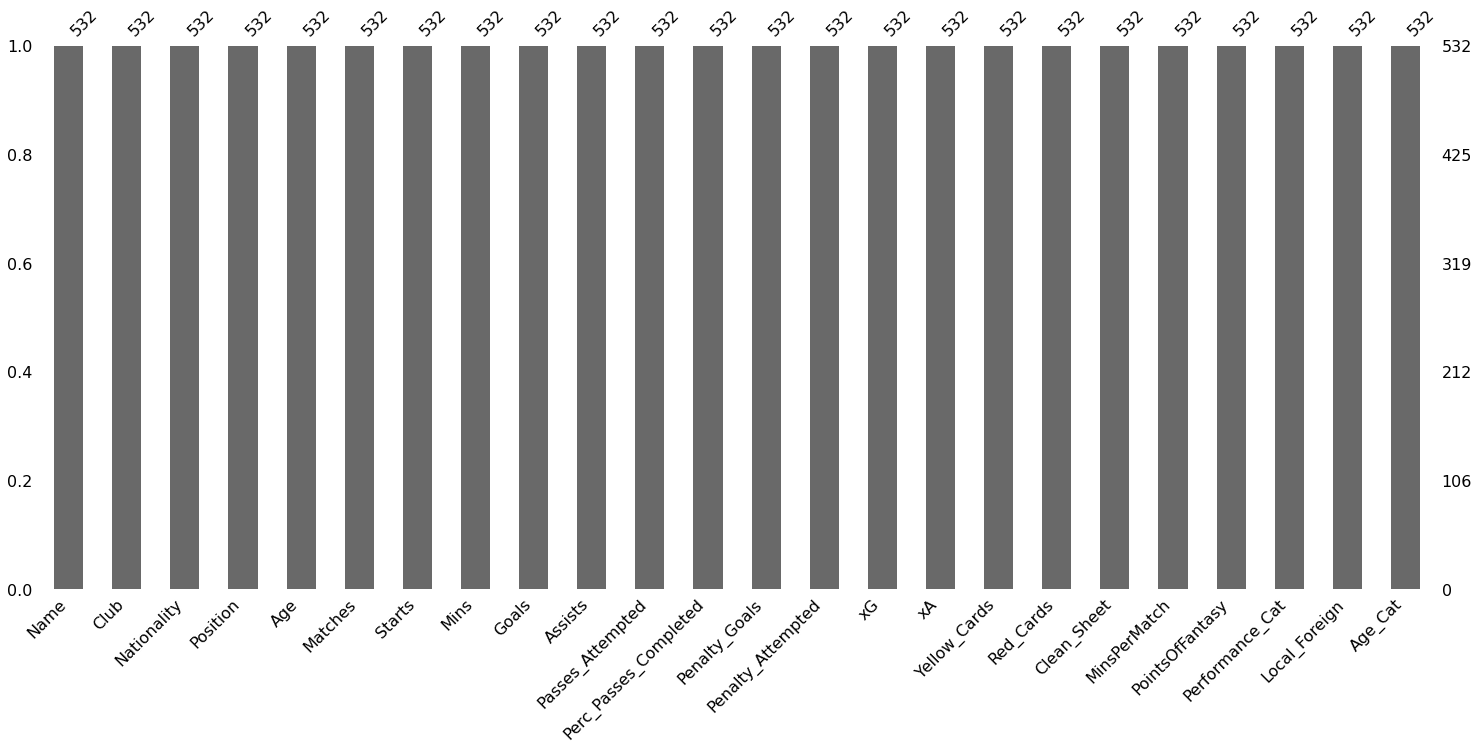

In [8]:
msno.bar(epl_df)

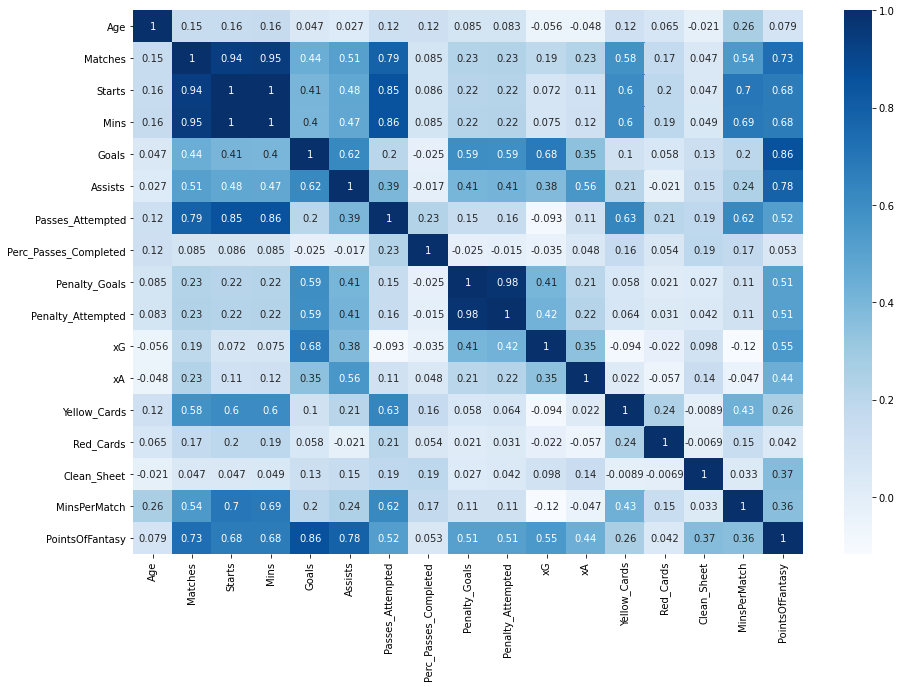

In [9]:
#Matrice de correlation----------------------------------------------
corr_matrix = epl_df.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Blues)
plt.show()

In [12]:
total_goals = epl_df['Goals'].sum()
total_penalty_goals = epl_df['Penalty_Goals'].sum()
total_penalty_attempted = epl_df['Penalty_Attempted'].sum()

986


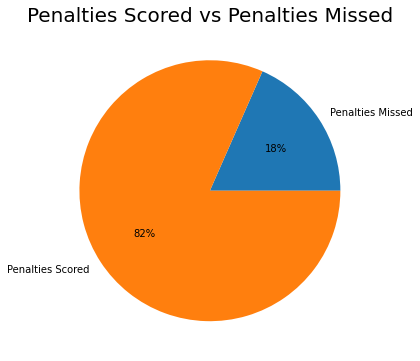

In [15]:
plt.figure(figsize=(13, 6))
penalty_not_scored = total_penalty_attempted - total_penalty_goals
data = [penalty_not_scored, total_penalty_goals]
labels = ['Penalties Missed', 'Penalties Scored']
colors = sns.color_palette()
plt.title('Penalties Scored vs Penalties Missed', fontsize = 20)
plt.pie(data, labels = labels, colors = colors, autopct = '%.0f%%')
plt.show()

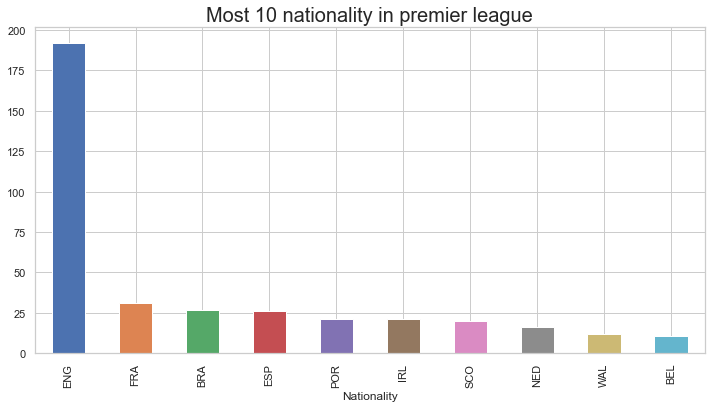

In [112]:
nationality = epl_df.groupby('Nationality').size().sort_values(ascending = False)
nationality.head(10).plot(kind = 'bar', figsize = (12,6), color = sns.color_palette())
plt.title('Most 10 nationality in premier league', fontsize = 20)
plt.show()

In [113]:
nationality[0]

192

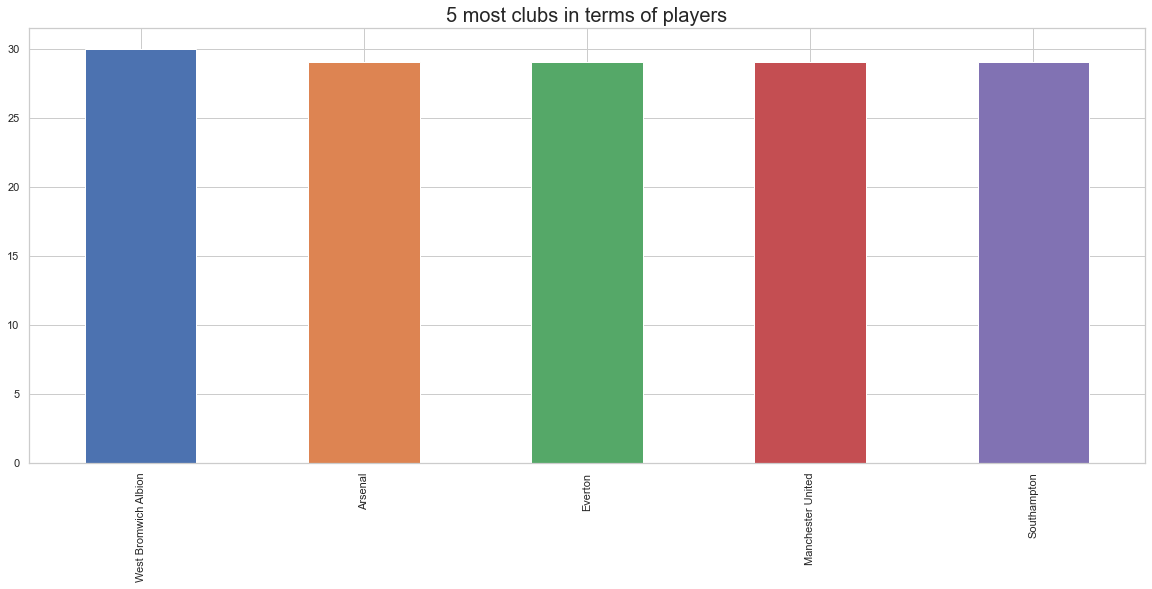

In [93]:
epl_df['Club'].value_counts().nlargest(5).plot(kind = 'bar', color = sns.color_palette())
plt.title('5 most clubs in terms of players', fontsize = 20)
plt.show()

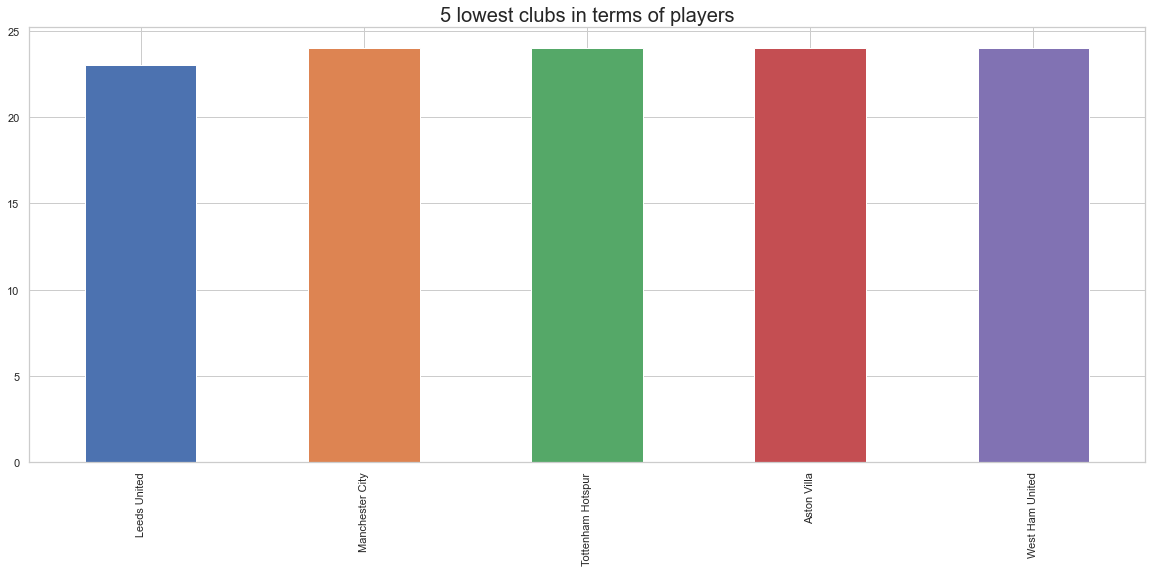

In [108]:
epl_df['Club'].value_counts().nsmallest(5).plot(kind = 'bar', color = sns.color_palette())
plt.title('5 lowest clubs in terms of players', fontsize = 20)
plt.show()

In [136]:
players_under_20 = epl_df[epl_df['Age'] <= 20]
plyayers_between_20_25 = epl_df[(epl_df['Age'] > 20) & (epl_df['Age'] <= 25)]
players_between_25_30 = epl_df[(epl_df['Age'] > 25) & (epl_df['Age'] <= 30)]
players_above_30 = epl_df[epl_df['Age'] > 30]

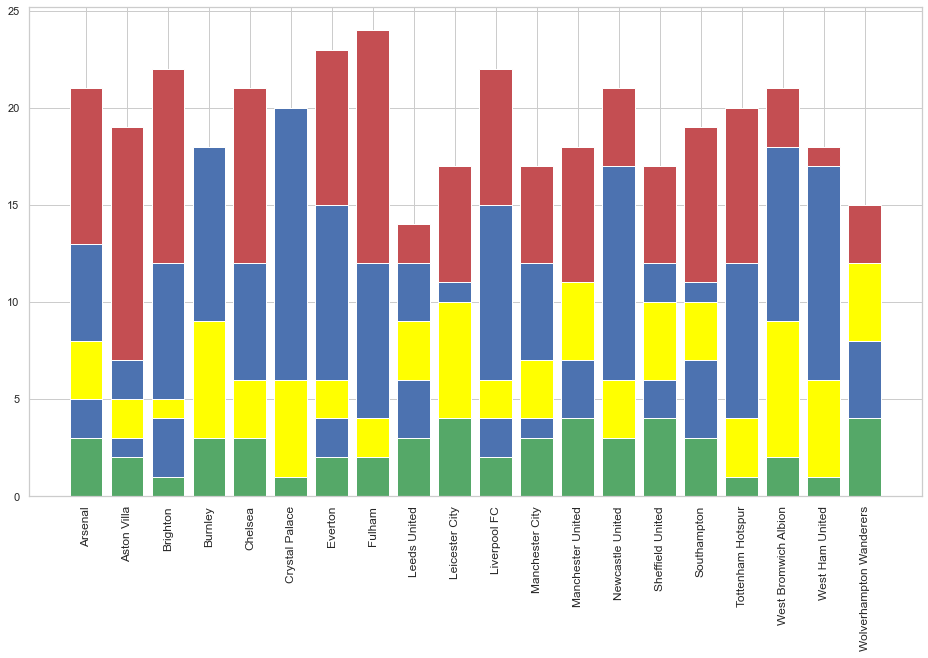

Club
Arsenal                    11
Aston Villa                14
Brighton                   11
Burnley                     4
Chelsea                    12
Crystal Palace              3
Everton                    10
Fulham                     14
Leeds United                5
Leicester City             12
Liverpool FC                9
Manchester City             8
Manchester United          11
Newcastle United            7
Sheffield United            9
Southampton                11
Tottenham Hotspur          11
West Bromwich Albion       10
West Ham United             6
Wolverhampton Wanderers     8
Name: Age, dtype: int64

In [191]:
x1 = players_under_20[['Age', 'Club']].groupby('Club').count()['Age']
x2 = plyayers_between_20_25[['Age', 'Club']].groupby('Club').count()['Age']
x3 = players_between_25_30[['Age', 'Club']].groupby('Club').count()['Age']
x4 = players_above_30[['Age', 'Club']].groupby('Club').count()['Age']
clubs = players_under_20[['Age', 'Club']].groupby('Club').count().index
fig, ax = plt.subplots(figsize =(16, 9))
ax.bar(clubs, x1, color='g')
ax.bar(clubs, x2, bottom=x3, color='r')
ax.bar(clubs, x3, bottom=x4, color='b')
ax.bar(clubs, x4, bottom=x1, color='yellow')
plt.xticks(clubs,rotation=90,fontsize=12)
plt.show()

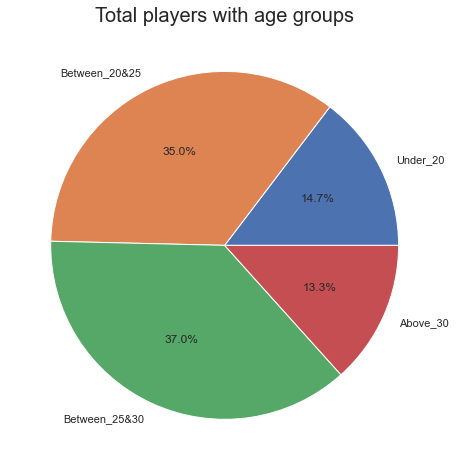

In [107]:
x = np.array([players_under_20['Name'].count(), plyayers_between_20_25['Name'].count(), players_between_25_30['Name'].count(), players_above_30['Name'].count()])
myLabels = ['Under_20','Between_20&25','Between_25&30','Above_30']
plt.title('Total players with age groups', fontsize = 20)
plt.pie(x, labels = myLabels, autopct = '%.1f%%')
plt.show()

Text(0.5, 1.0, 'Most clubs have players under 20')

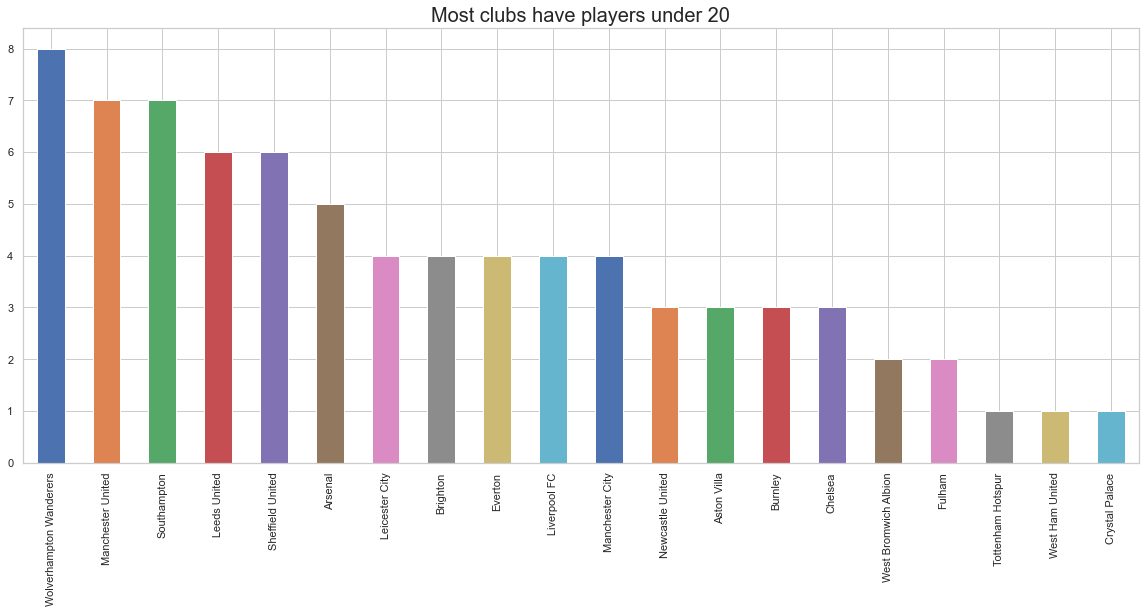

In [106]:
players_under_20['Club'].value_counts().plot(kind = 'bar', color = sns.color_palette())
plt.title('Most clubs have players under 20', fontsize = 20)

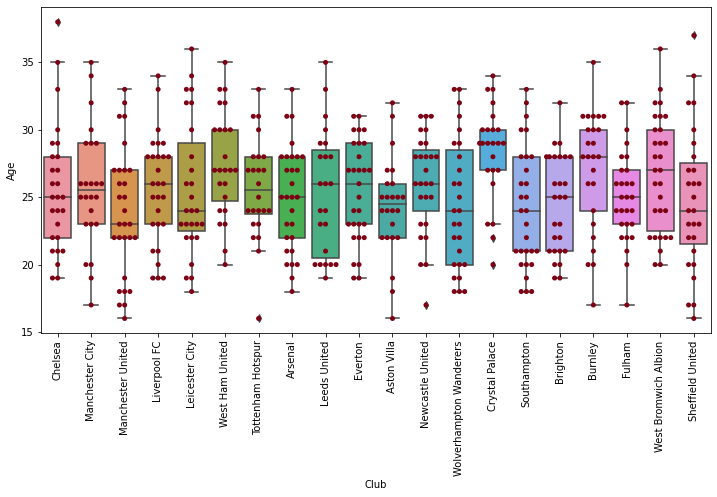

In [26]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x = 'Club', y = 'Age', data = epl_df)
ax = sns.swarmplot(x = 'Club', y = 'Age', data = epl_df, color='#7d0013')
plt.xticks(rotation = 90)
plt.show()

In [89]:
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['Age'],df['Goals'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05
# Ordinary Least Squares (OLS) model
model = ols('Age ~ C(Club)', data=epl_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
res = stat()
res.anova_stat(df=epl_df, res_var='value', anova_model='Age ~ C(Club)')
res.anova_summary

9982.512565727135 0.0


,df,sum_sq,mean_sq,F,PR(>F)
C(Club),19.0,655.566665,34.503509,1.90952,0.011716
Residual,512.0,9251.433335,18.069206,NaN,NaN


In [ ]:
number_of_players = epl_df.groupby('Club').size()
data = (epl_df.groupby('Club')['Age'].sum())/number_of_players
data.sort_values(ascending=False)

In [ ]:
assists_by_club = pd.DataFrame(epl_df.groupby('Club', as_index=False)['Assists'].sum())
sns.set_theme(style="whitegrid", color_codes=True)
ax = sns.barplot(x='Club', y='Assists', data=assists_by_club.sort_values(by='Assists', ascending=False), palette='Set2')
ax.set_xlabel('Club', fontsize=30)
ax.set_ylabel('Assists', fontsize=20)
plt.xticks(rotation=75)
plt.rcParams['figure.figsize'] = (20,8)
plt.title('Assists of each Club', fontsize=20)

In [ ]:
top_10_Assists = epl_df[['Name','Club','Assists','Matches']].nlargest(n=10,columns='Assists')
top_10_Assists

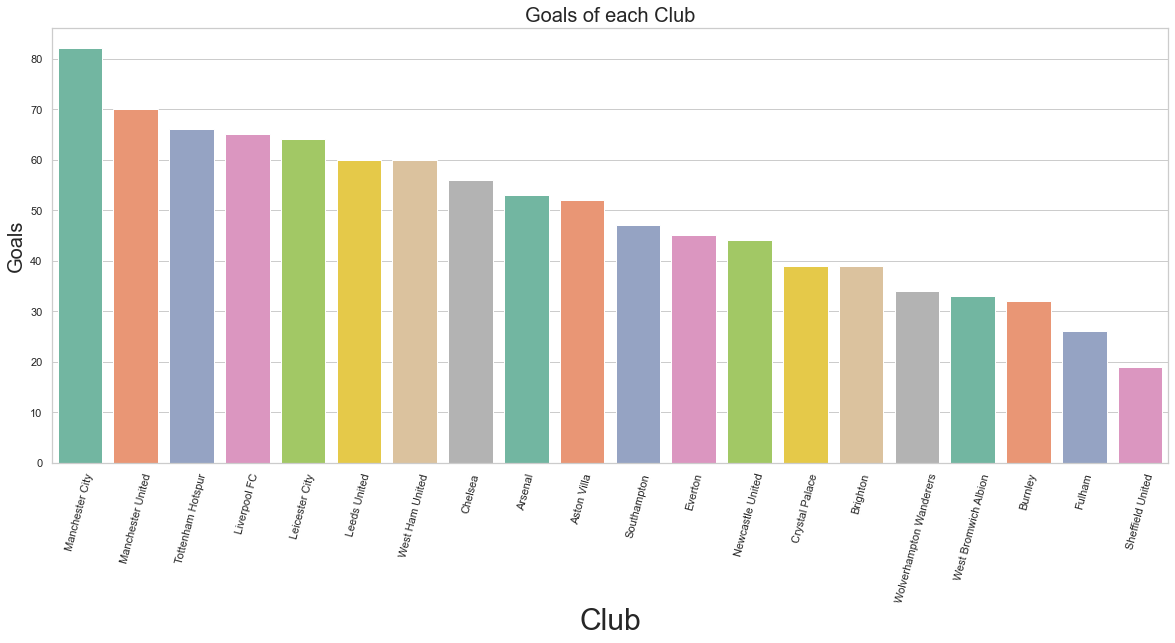

In [114]:
goals_by_club = pd.DataFrame(epl_df.groupby('Club', as_index=False)['Goals'].sum())
sns.set_theme(style="whitegrid", color_codes=True)
ax = sns.barplot(x='Club', y='Goals', data=goals_by_club.sort_values(by='Goals', ascending=False), palette='Set2')
ax.set_xlabel('Club', fontsize=30)
ax.set_ylabel('Goals', fontsize=20)
plt.xticks(rotation=75)
plt.rcParams['figure.figsize'] = (20,8)
plt.title('Goals of each Club', fontsize=20)
plt.show()

In [29]:
top_10_Goals = epl_df[['Name','Club','Goals','Matches']].nlargest(n=10,columns='Goals')
top_10_Goals

,Name,Club,Goals,Matches
162,Harry Kane,Tottenham Hotspur,23,35
81,Mohamed Salah,Liverpool FC,22,37
51,Bruno Fernandes,Manchester United,18,37
161,Son Heung-min,Tottenham Hotspur,17,37
214,Patrick Bamford,Leeds United,17,38
237,Dominic Calvert-Lewin,Everton,16,33
110,Jamie Vardy,Leicester City,15,34
267,Ollie Watkins,Aston Villa,14,37
33,İlkay Gündoğan,Manchester City,13,28
191,Alexandre Lacazette,Arsenal,13,31


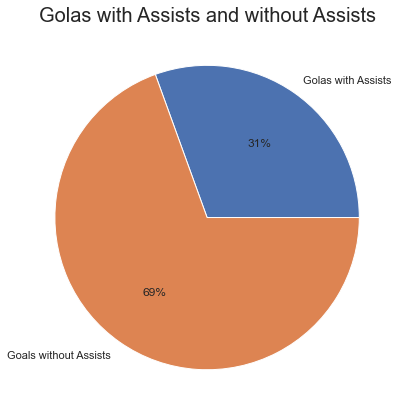

In [30]:
plt.figure(figsize=(14,7))
assists = epl_df['Assists'].sum()
goals = epl_df['Goals'].sum()
data = [goals-assists,assists]
labels = ['Golas with Assists','Goals without Assists']
color = sns.color_palette()
plt.title('Golas with Assists and without Assists', fontsize = 20)
plt.pie(data, labels=labels, colors=color, autopct='%.0f%%')
plt.show()

<AxesSubplot:title={'center':'Players with the most yellow cards'}, xlabel='Name', ylabel='Number of yellow cards'>

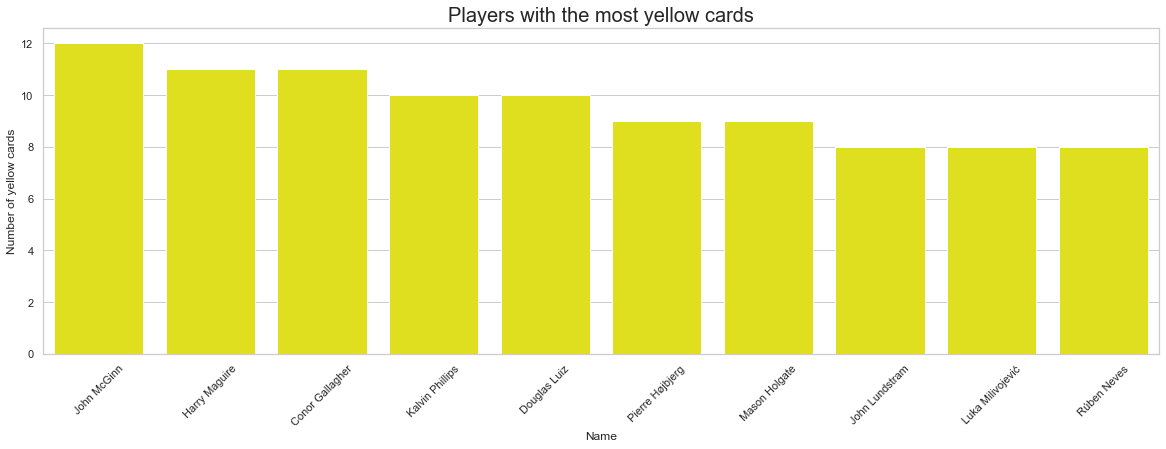

In [31]:
top_10_players_with_yellow_cards = epl_df.sort_values(by='Yellow_Cards',ascending=False)[:10]
plt.figure(figsize=(20,6))
plt.title('Players with the most yellow cards', fontsize = 20)
c = sns.barplot(x=top_10_players_with_yellow_cards['Name'], y=top_10_players_with_yellow_cards['Yellow_Cards'], label='Players', color='yellow')
plt.ylabel('Number of yellow cards')
c.set_xticklabels(c.get_xticklabels(), rotation=45)
c

<AxesSubplot:xlabel='xG', ylabel='Goals'>

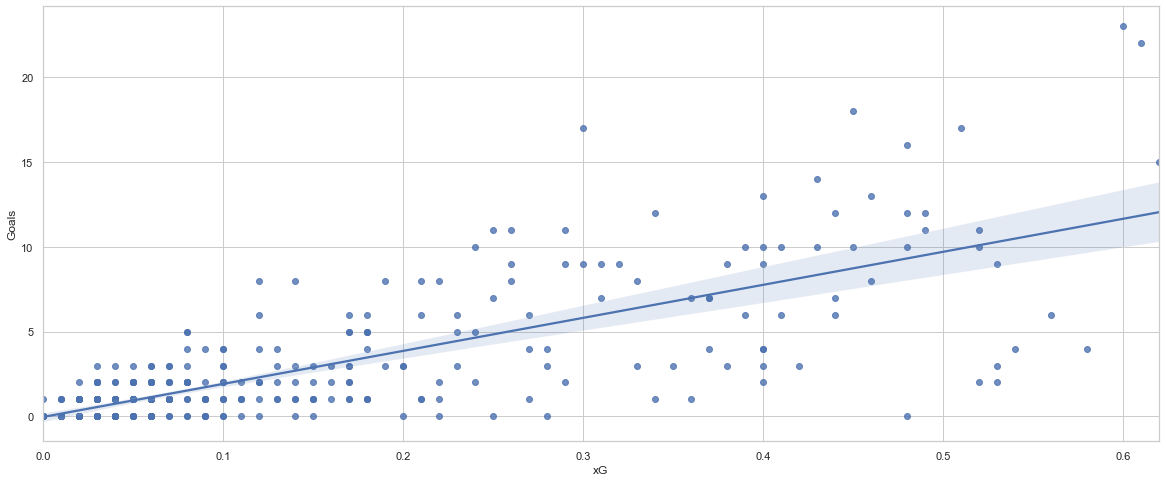

In [32]:
df = epl_df[epl_df['Matches']>10]
sns.regplot(x="xG", y="Goals", data=df)

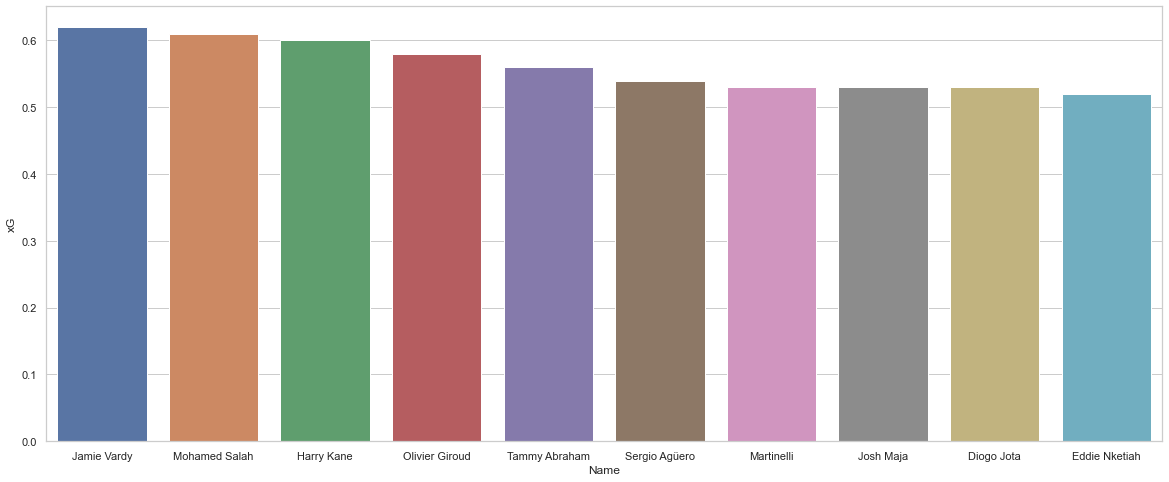

In [33]:
df = epl_df[epl_df['Matches']>10].sort_values('xG',ascending=False)[['Name','xG','Goals','Club','Position']].head(10)
ax = sns.barplot(x="Name", y="xG", data=df)

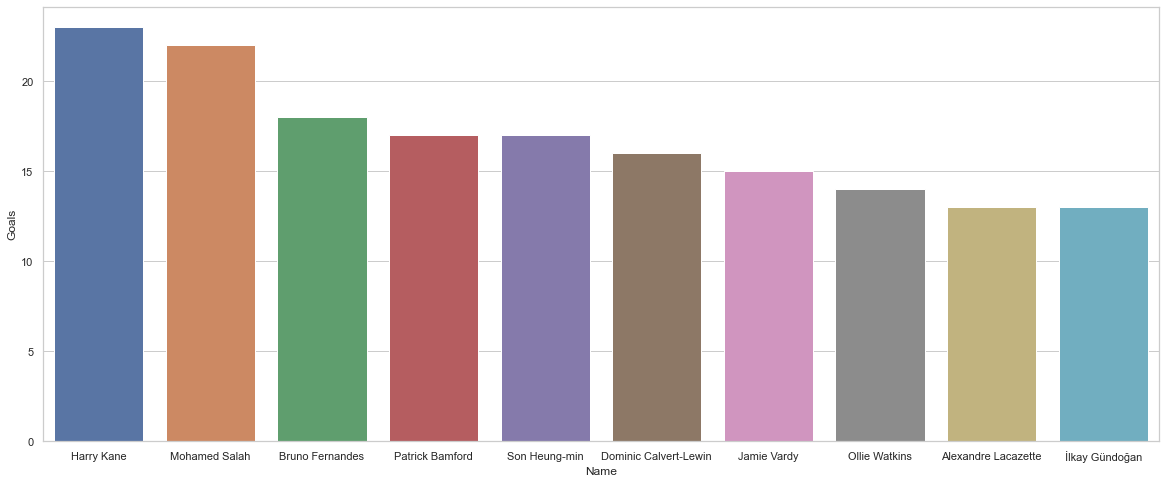

In [34]:
df = epl_df[epl_df['Matches']>10].sort_values('Goals',ascending=False)[['Name','xG','Goals','Club','Position']].head(10)
ax = sns.barplot(x="Name", y="Goals", data=df)

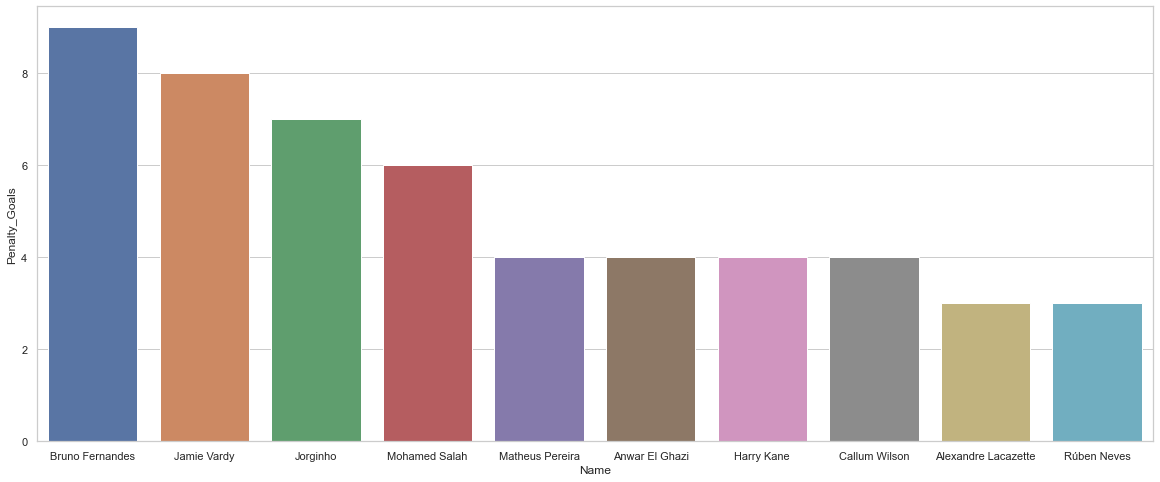

In [35]:
df = epl_df[epl_df['Penalty_Goals']>0].sort_values('Penalty_Goals',ascending=False)[['Name','Penalty_Attempted','Penalty_Goals','Club','Position']].head(10)
ax = sns.barplot(x="Name", y="Penalty_Goals", data=df)

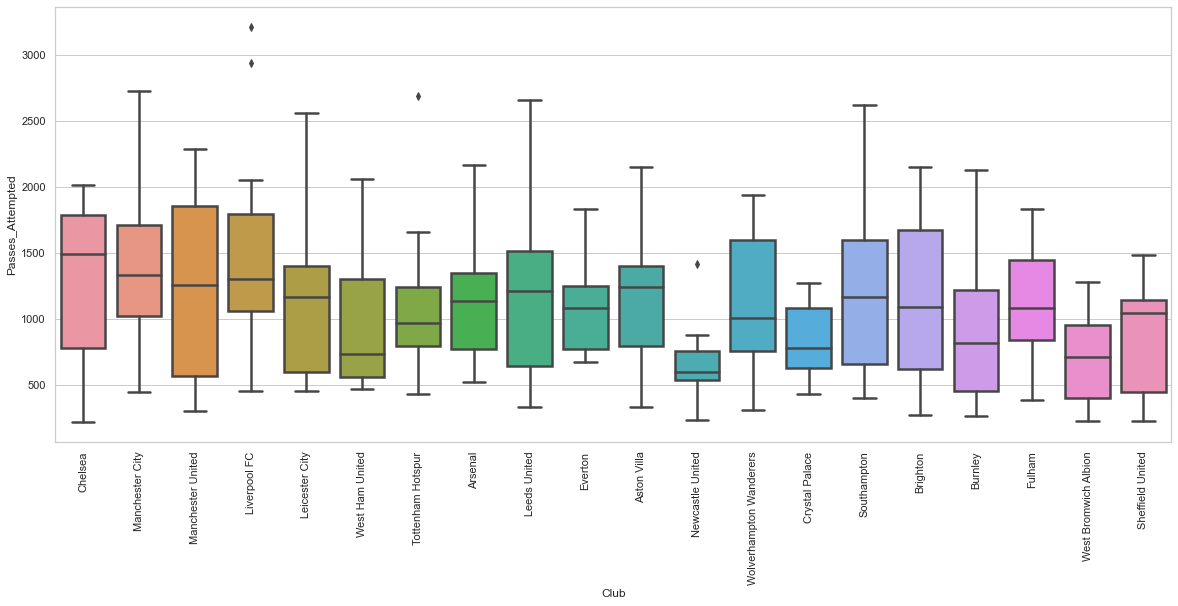

In [36]:
df= epl_df[epl_df['Starts']>10]
sns.boxplot(x="Club", y="Passes_Attempted", data=df, linewidth=2.5)
plt.xticks(rotation = 90)
plt.show()

<Figure size 1440x576 with 0 Axes>

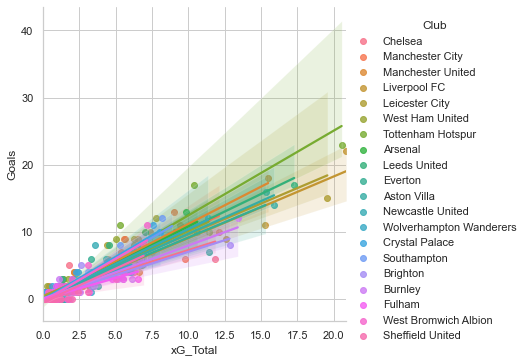

In [37]:
df = epl_df
dfxg = df
dfxg['xG_Total'] = dfxg['xG']*dfxg['Mins']/90
plt.figure(figsize = (20,8))
sns.lmplot(x="xG_Total", y="Goals", hue="Club", data=dfxg)

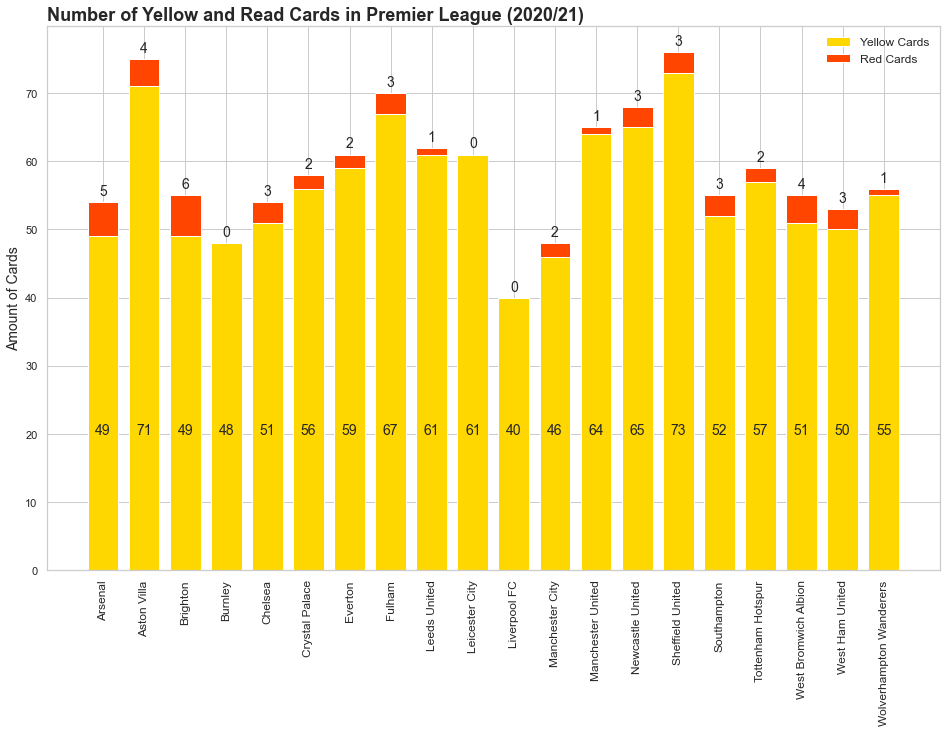

In [38]:
redyello = epl_df[['Club','Red_Cards','Yellow_Cards']]
df_1 = redyello.groupby('Club', as_index=False).agg({"Red_Cards": "sum", "Yellow_Cards": "sum"})
countries = df_1["Club"]
red_cards = df_1['Red_Cards']
yellow_cards = df_1['Yellow_Cards']

width = 0.75
fig, ax = plt.subplots(figsize=(16, 10))

ax.bar(countries, yellow_cards, width, label='Yellow Cards', color='gold')
ax.bar(countries, red_cards, width, bottom=yellow_cards, label='Red Cards', color='orangered')

ax.set_ylabel('Amount of Cards', fontsize=14)
ax.set_title('Number of Yellow and Read Cards in Premier League (2020/21)', loc='left', fontsize=18, fontweight ='bold')
plt.xticks(countries, rotation=90, fontsize=12)

for index, data in enumerate(red_cards):
    plt.text(x=index , y=data + yellow_cards[index] + 1 , s=f"{data}" , fontdict=dict(fontsize=14), horizontalalignment='center')

for index, data in enumerate(yellow_cards):
    plt.text(x=index , y=20 , s=f"{data}" , fontdict=dict(fontsize=14), horizontalalignment='center')

ax.legend(fontsize=12, frameon=False)

plt.show()

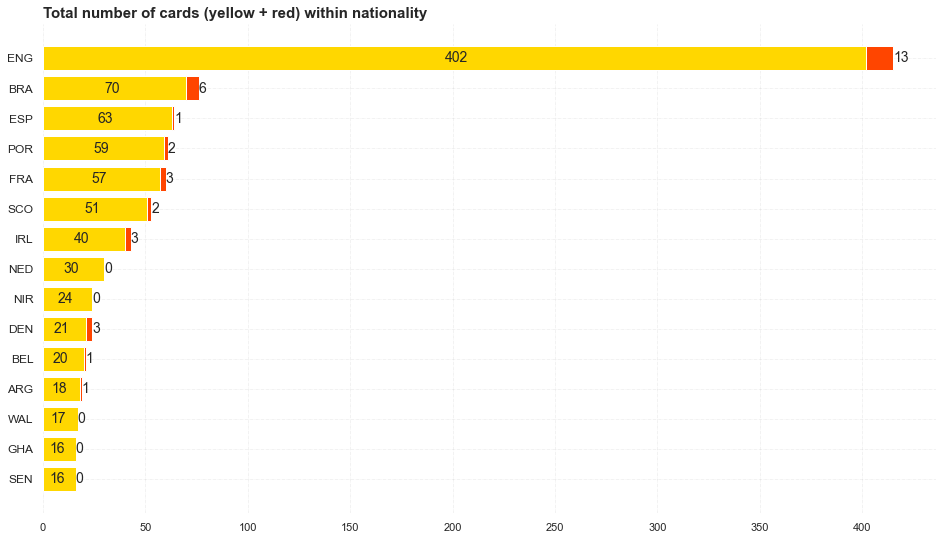

In [39]:
df_2 = epl_df[['Name','Nationality','Yellow_Cards','Red_Cards']].groupby('Nationality').agg({'Yellow_Cards':'sum', 'Red_Cards':'sum','Name':'count'}).sort_values(by=['Yellow_Cards', 'Red_Cards'], ascending=False).head(15)
df_2.rename(columns={'Name':'#_Players'}, inplace=True)

countries = df_2.index
red_cards = df_2['Red_Cards']
yellow_cards = df_2['Yellow_Cards']

fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(countries, yellow_cards, color='gold')
ax.barh(countries, red_cards, left=yellow_cards, color='orangered')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
x_red = red_cards.tolist()
y_yellow = yellow_cards.tolist()

 

for index, data in enumerate(x_red):
    plt.text(x=data + y_yellow[index], y=index , s=f"{data}" , fontdict=dict(fontsize=14), verticalalignment='center')

 

for index, data in enumerate(y_yellow):
    plt.text(x=data /2 - 5, y=index, s=f"{data}" , fontdict=dict(fontsize=14), verticalalignment='center')
    
 

ax.set_title('Total number of cards (yellow + red) within nationality',
             loc ='left', size=15, fontweight ='bold' )

plt.yticks(fontsize=12)


plt.show()

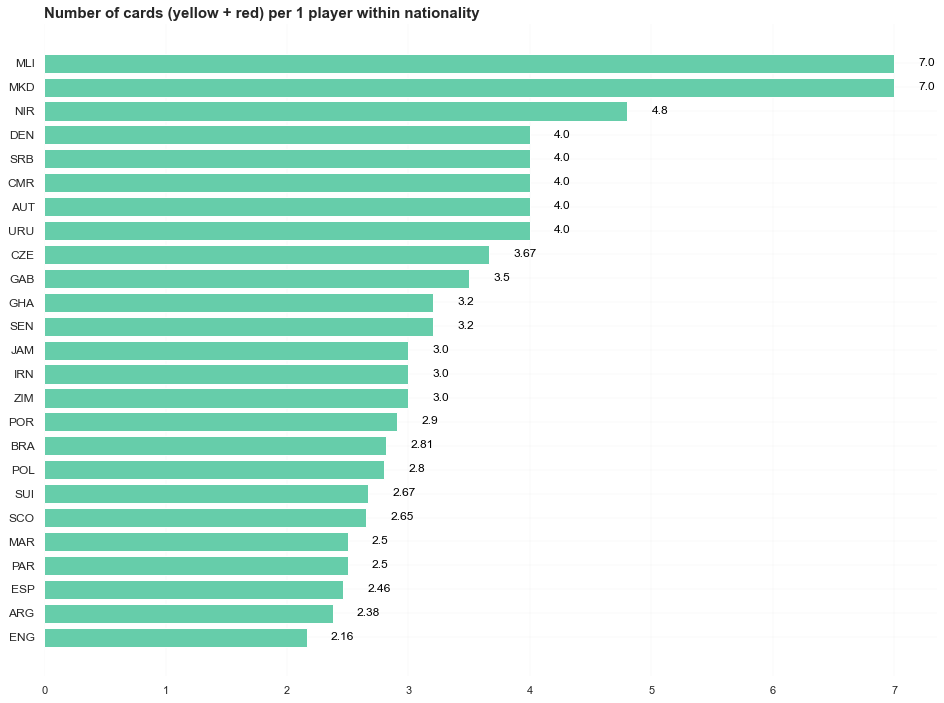

In [40]:
cards_per_nation = epl_df[['Name', 'Nationality', 'Yellow_Cards', 'Red_Cards']].groupby('Nationality').agg({'Yellow_Cards':'sum', 'Red_Cards':'sum', 'Name':'count'})
cards_per_nation['Total_Cards'] = cards_per_nation.Yellow_Cards + cards_per_nation.Red_Cards
cards_per_nation.rename(columns={'Name':'#_Players'}, inplace=True)
cards_per_nation['Cards_per_Player'] = cards_per_nation['Total_Cards'] / cards_per_nation['#_Players']
cards_per_nation = cards_per_nation.sort_values(by=['Cards_per_Player', '#_Players'], ascending=False).reset_index().head(25)

countries = cards_per_nation['Nationality']
cards = cards_per_nation['Cards_per_Player']
 
fig, ax = plt.subplots(figsize =(16, 12))
ax.barh(countries, cards, color='mediumaquamarine')

 

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.grid(b = True, color ='grey',
        linestyle ='-', linewidth = 0.2,
        alpha = 0.2)
 
ax.invert_yaxis()

 
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=12,
             color='black') # fontweight ='bold',

ax.set_title('Number of cards (yellow + red) per 1 player within nationality',
             loc='left', size=15, fontweight='bold')


plt.yticks(fontsize=12)


plt.show()

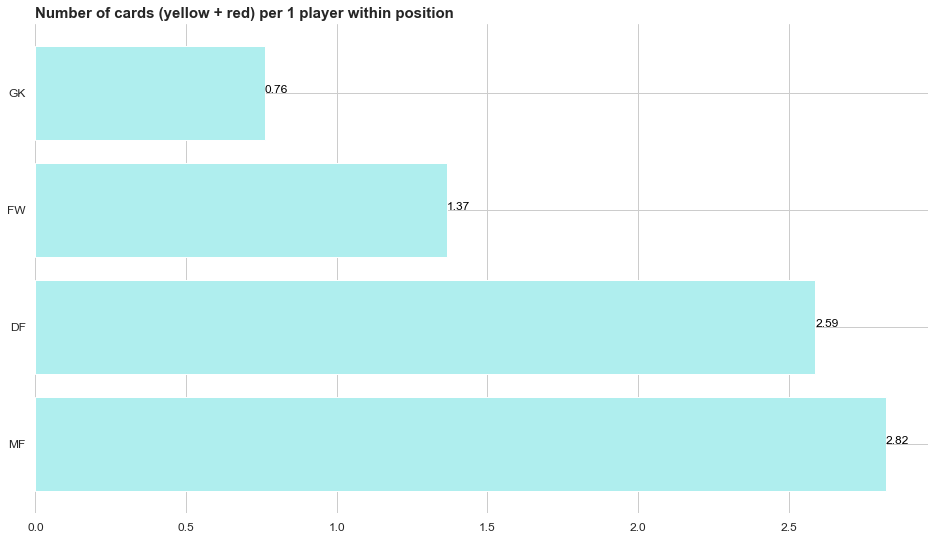

In [41]:
cards_per_position = epl_df[['Name','Position', 'Yellow_Cards', 'Red_Cards']].groupby('Position').agg({'Yellow_Cards':'sum', 'Red_Cards':'sum', 'Name':'count'}).reset_index()
cards_per_position['Total_Cards'] = cards_per_position.Yellow_Cards + cards_per_position.Red_Cards
cards_per_position.rename(columns={'Name':'#_Players'}, inplace=True)
cards_per_position['Cards_per_Position'] = cards_per_position['Total_Cards'] / cards_per_position['#_Players']
cards_per_position = cards_per_position.reset_index(drop=True).sort_values(by=['Cards_per_Position', '#_Players'],ascending=False)
positions = cards_per_position['Position']
cards = cards_per_position['Cards_per_Position']

fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(positions, cards, color='paleturquoise')

 

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)


# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.4,
             str(round((i.get_width()), 2)),
             fontsize = 12,
             color ='black') # fontweight ='bold'

 

ax.set_title('Number of cards (yellow + red) per 1 player within position',
             loc ='left', size=15, fontweight ='bold' )


plt.yticks(fontsize=12)
plt.xticks(fontsize=12)


plt.show()

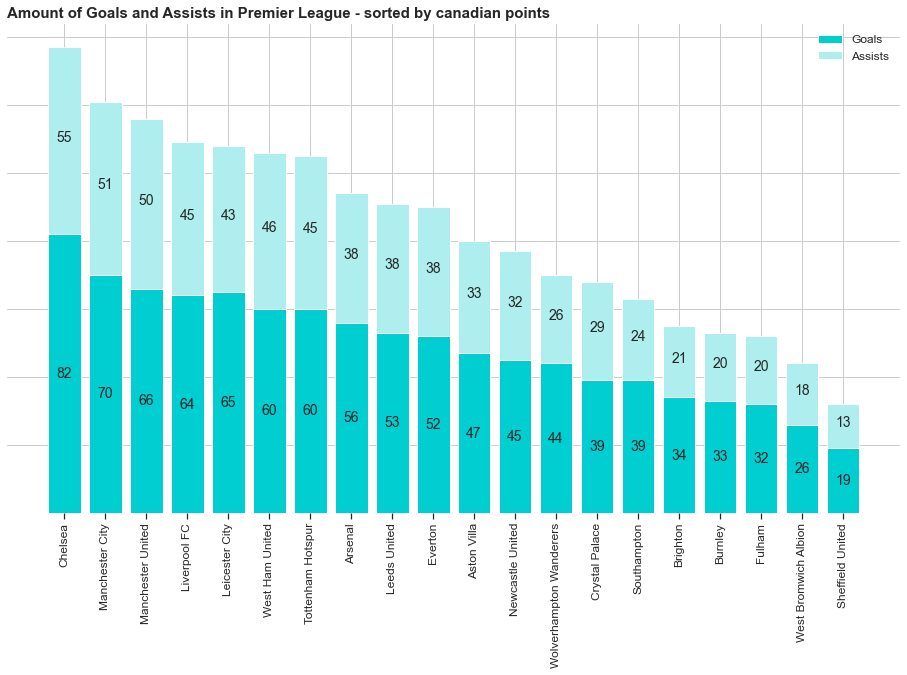

In [115]:
df_goals = epl_df.copy()
df_goals['xGoals'] = round(df_goals.xG * df_goals.Matches,0).astype(int)
df_goals['xG_diff'] =  (df_goals.Goals - df_goals.xGoals).astype(int)
df_goals = df_goals[['Name', 'Club', 'Nationality', 'Position', 'Goals', 'xGoals', 'xG_diff', 'Assists']].groupby('Club').sum()
df_goals['Canadian_Points'] = df_goals.Goals + df_goals.Assists
df_goals = df_goals.sort_values(by='Canadian_Points', ascending=False) 
df_goals
goals = df_goals['Goals']
assists = df_goals['Assists']
clubs = epl_df['Club'].unique()
fig, ax = plt.subplots(figsize =(16, 9))
ax.bar(clubs, goals, label="Goals", color='darkturquoise')
ax.bar(clubs, assists, bottom=goals, label="Assists", color='paleturquoise')
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

x_goals = goals.tolist()
x_assists = assists.tolist()

for ia, da in enumerate(x_assists):
    plt.text(x=ia, y=da / 2 + x_goals[ia] + 1, s=f"{da}", fontdict=dict(fontsize=14), horizontalalignment='center', verticalalignment='center')

for ig, dg in enumerate(x_goals):
    plt.text(x=ig, y=dg / 2, s=f"{dg}", fontdict=dict(fontsize=14), horizontalalignment='center', verticalalignment='center')

ax.set_title('Amount of Goals and Assists in Premier League - sorted by canadian points',
             loc='left', size=15, fontweight='bold')

ax.legend(fontsize=12, frameon=False)
plt.tick_params(left = False, right = False, labelleft=False, labelbottom=True, bottom=True)
plt.xticks(clubs,rotation=90,fontsize=12)
plt.show()

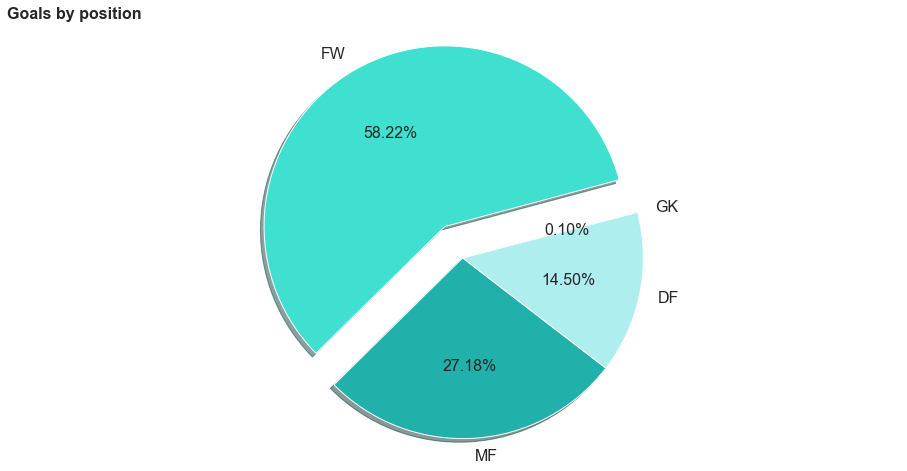

In [43]:
# variables
my_labels = epl_df[['Position','Goals']].groupby(['Position']).sum().sort_values(by=['Goals'],ascending=False).head(10).index.tolist()
my_colors = ['turquoise','lightseagreen','paleturquoise','darkturquoise']
myexplode = [0.2, 0, 0, 0]

# plot
df[['Position','Goals']].groupby(['Position']).sum().sort_values(by=['Goals'],ascending=False).head(10)\
        .plot(x='Name',kind='pie', figsize=(16,8), subplots=True, labels=my_labels,startangle=15, 
        shadow=True, colors=my_colors, explode=myexplode, autopct='%1.2f%%', fontsize=16)

plt.title('Goals by position', loc ='left', size=16, fontweight ='bold')
plt.ylabel(None)
plt.axis('equal')

plt.legend([],frameon=False)

plt.show()

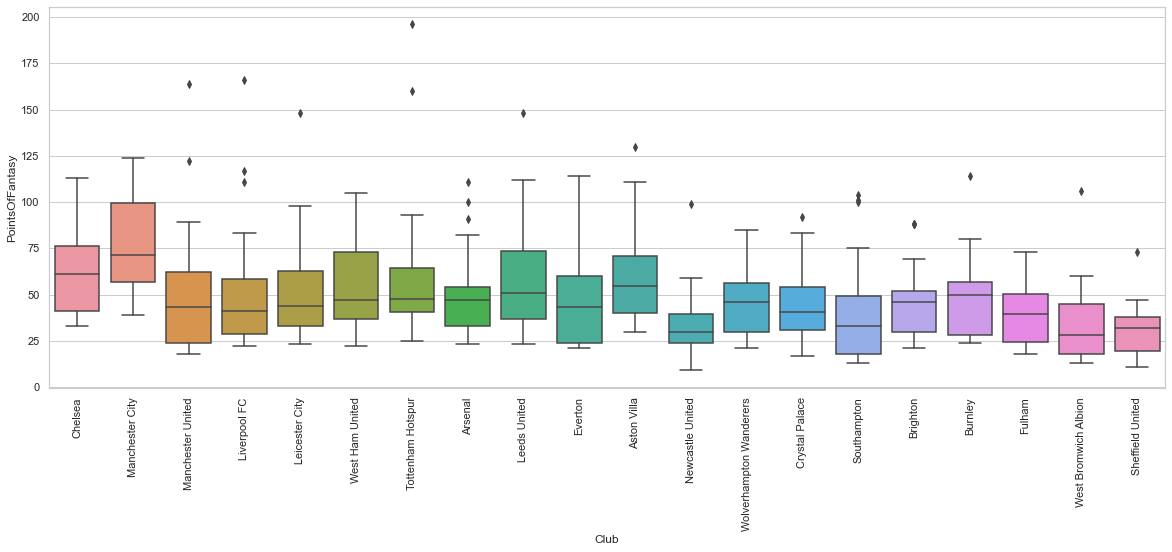

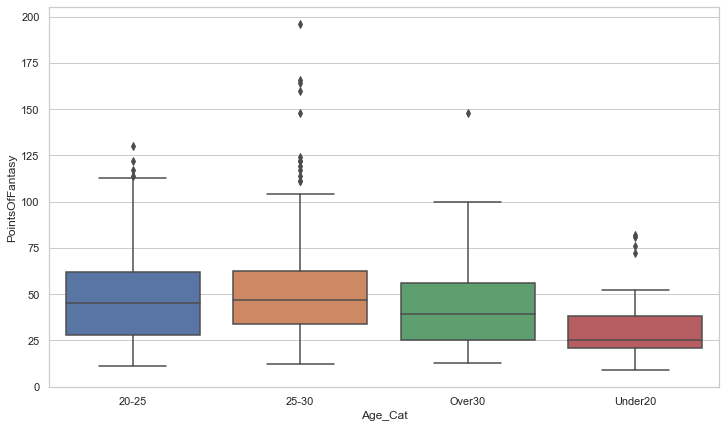

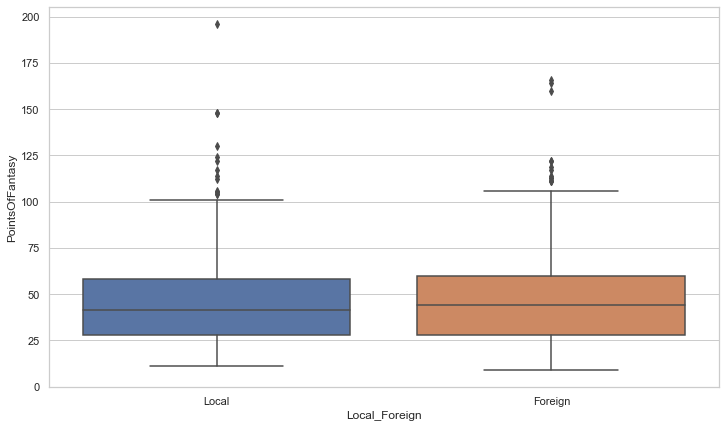

In [44]:
#ANOVA
#Boite a moustache 1 variable
plt.figure(figsize=(20,7))
sns.boxplot(x = 'Club', y = 'PointsOfFantasy', data = epl_df)
plt.xticks(rotation = 90)
plt.show()
#Boite a moustache deux variables
plt.figure(figsize=(12,7))
sns.boxplot(x = 'Age_Cat', y = 'PointsOfFantasy', data = epl_df)
plt.show()
plt.figure(figsize=(12,7))
sns.boxplot(x = 'Local_Foreign', y = 'PointsOfFantasy', data = epl_df)
plt.show()

In [45]:
#application de ANOVA1
model = ols('PointsOfFantasy ~ C(Club)', data=epl_df).fit()
print(sm.stats.anova_lm(model, typ=1))
#Application ANOVA2
model = ols('PointsOfFantasy ~ C(Local_Foreign) + C(Age_Cat) + C(Local_Foreign):C(Age_Cat)', data=epl_df).fit()
sm.stats.anova_lm(model, typ=2)

             df         sum_sq      mean_sq         F        PR(>F)
C(Club)    19.0   62169.150925  3272.060575  5.033494  4.765514e-11
Residual  512.0  332829.426143   650.057473       NaN           NaN


,sum_sq,df,F,PR(>F)
C(Local_Foreign),432.570694,1.0,0.607284,0.436164
C(Age_Cat),21534.981297,3.0,10.077622,0.000002
C(Local_Foreign):C(Age_Cat),215.055315,3.0,0.100638,0.959630
Residual,373247.105239,524.0,NaN,NaN


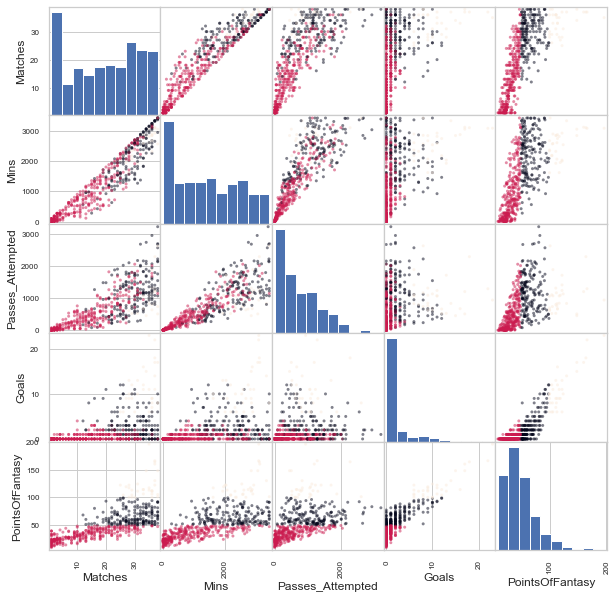

In [63]:
#ACP
acp_df = epl_df[['Matches','Mins','Passes_Attempted','Goals','PointsOfFantasy']]
#Affichage des nuages des points par couples de variables :
acp_df = epl_df[['Matches','Mins','Passes_Attempted','Goals','PointsOfFantasy']]
colors = epl_df['Performance_Cat'].astype('category')
# Les couleurs déduites de chaque categorie de performance
y = colors.cat.codes 
scatter_matrix(acp_df,alpha = 0.5,figsize=(10,10),range_padding=0.05,c=y)
plt.show()

In [64]:
#Centralisation et reduction des donnees
X= acp_df
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X) 
from sklearn.preprocessing import scale
X = scale(X)

In [73]:
mypca = PCA()
# On paramètre ici pour ne garder que 3 composantes
# Modèle d'ACP
mypca.fit(X)
# Pourcentage de la variance expliquée par chacune des composantes sélectionnées.
print(mypca.singular_values_) # Valeurs de variance
print(mypca.explained_variance_ratio_) #  Pourcentages
# Axes principaux dans l'espace des caractéristiques, représentant les directions de la variance maximale dans les données. Les composantes sont triées par variance expliquée.
print(mypca.components_) # 
# Résultats de l'ACP
data_sortie= mypca.fit_transform(X)
# Bruit estimé lié à la covariance
print(mypca.noise_variance_)

[43.85675772 24.00654699 10.02666682  6.44374194  4.26786199]
[0.72308842 0.21665951 0.03779475 0.0156097  0.00684761]
[[ 0.49359883  0.49107811  0.42750091  0.34366901  0.46296551]
 [-0.19780776 -0.27911358 -0.46304852  0.70803843  0.40894418]
 [-0.57424087 -0.27608543  0.74697237  0.16608348  0.09204794]
 [ 0.16314547 -0.44321677 -0.00528427 -0.53651308  0.69933414]
 [-0.60071896  0.63896293 -0.21173899 -0.25523163  0.3476874 ]]
0.0


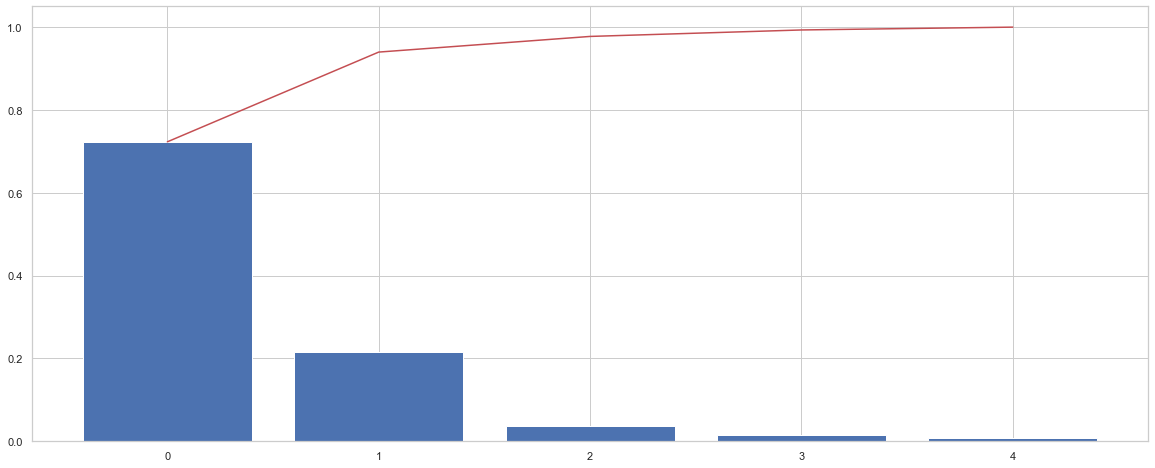

In [74]:
y = list(mypca.explained_variance_ratio_)
x = range(len(y))
ycum = np.cumsum(y)
plt.bar(x,y)
plt.plot(x,ycum,"-r")
plt.show()

In [76]:
from scipy.spatial import ConvexHull
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
from sklearn.decomposition import PCA
def biplot(pca=[],x=None,y=None,components=[0,1],score=None,coeff=None,coeff_labels=None,score_labels=None,circle='T',bigdata=1000,cat=None,cmap="viridis",density=True):
    if isinstance(pca,PCA)==True :
        coeff = np.transpose(pca.components_[components, :])
        score=  pca.fit_transform(x)[:,components]
        if isinstance(x,pd.DataFrame)==True :
            coeff_labels = list(x.columns)
    if score is not None : x = score
    if x.shape[1]>1 :
        xs = x[:,0]
        ys = x[:,1]
    else :
        xs = x
        ys = y
    if (len(xs) != len(ys)) : print("Warning ! x et y n'ont pas la même taille !")
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    #x_c = xs * scalex
    #y_c = ys * scaley
    temp = (xs - xs.min())
    x_c = temp / temp.max() * 2 - 1
    temp = (ys - ys.min())
    y_c = temp / temp.max() * 2 - 1
    data = pd.DataFrame({"x_c":x_c,"y_c":y_c})
    print("Attention : pour des facilités d'affichage, les données sont centrées-réduites")
    if cat is None : cat = [0]*len(xs)
    elif len(pd.Series(cat)) == 1 : cat = list(pd.Series(cat))*len(xs)
    elif len(pd.Series(cat)) != len(xs) : print("Warning ! Nombre anormal de catégories !")
    cat = pd.Series(cat).astype("category")
    fig = plt.figure(figsize=(14,14),facecolor='w') 
    ax = fig.add_subplot(111)
    # Affichage des points
    if (len(xs) < bigdata) :   
        ax.scatter(x_c,y_c, c = cat.cat.codes,cmap=cmap)
        if density==True : print("Warning ! Le mode density actif n'apparait que si BigData est paramétré.")
    # Affichage des nappes convexes (BigData)
    else :
        #color
        norm = mpl.colors.Normalize(vmin=0, vmax=(len(np.unique(cat.cat.codes)))) #-(len(np.unique(c)))
        cmap = cmap
        m = cm.ScalarMappable(norm=norm, cmap=cmap)
        if density==True :
            sns.set_style("white")
            sns.kdeplot(x="x_c",y="y_c",data=data)
            if len(np.unique(cat)) <= 1 :
                sns.kdeplot(x="x_c",y="y_c",data=data, cmap="Blues", shade=True, thresh= 0)
            else :
                for i in np.unique(cat) :
                    color_temp = m.to_rgba(i)
                    sns.kdeplot(x="x_c",y="y_c",data=data[cat==i], color=color_temp,
                                shade=True, thres=0.25, alpha=0.25)     
        for cat_temp in cat.cat.codes.unique():
            x_c_temp = [x_c[i] for i in range(len(x_c)) if (cat.cat.codes[i] == cat_temp)]
            y_c_temp = [y_c[i] for i in range(len(y_c)) if (cat.cat.codes[i] == cat_temp)]
            points = [ [ None ] * len(x_c_temp) ] * 2
            points = np.array(points)
            points = points.reshape(len(x_c_temp),2)
            points[:,0] = x_c_temp
            points[:,1] = y_c_temp
            hull = ConvexHull(points)
            temp = 0
            for simplex in hull.simplices:
                color_temp = m.to_rgba(cat_temp)
                plt.plot(points[simplex, 0], points[simplex, 1],color=color_temp)#, linestyle='dashed')#linewidth=2,color=cat)
                if (temp == 0) :
                     plt.xlim(-1,1)
                     plt.ylim(-1,1)
                     temp = temp+1
    if coeff is not None :
        if (circle == 'T') :
            x_circle = np.linspace(-1, 1, 100)
            y_circle = np.linspace(-1, 1, 100)
            X, Y = np.meshgrid(x_circle,y_circle)
            F = X**2 + Y**2 - 1.0
            #fig, ax = plt.subplots()
            plt.contour(X,Y,F,[0])
        n = coeff.shape[0]
        for i in range(n):
            plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5,
                      head_width=0.05, head_length=0.05)
            if coeff_labels is None:
                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
            else:
                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, coeff_labels[i], color = 'g', ha = 'center', va = 'center')
        if score_labels is not None :
            for i in range(len(score_labels)) :
                temp_x = xs[i] * scalex
                temp_y = ys[i] * scaley
                plt.text(temp_x,temp_y,list(score_labels)[i])
    plt.xlim(-1.2,1.2)
    plt.ylim(-1.2,1.2)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid(linestyle='--')
    plt.show()

Attention : pour des facilités d'affichage, les données sont centrées-réduites
Warning ! Le mode density actif n'apparait que si BigData est paramétré.


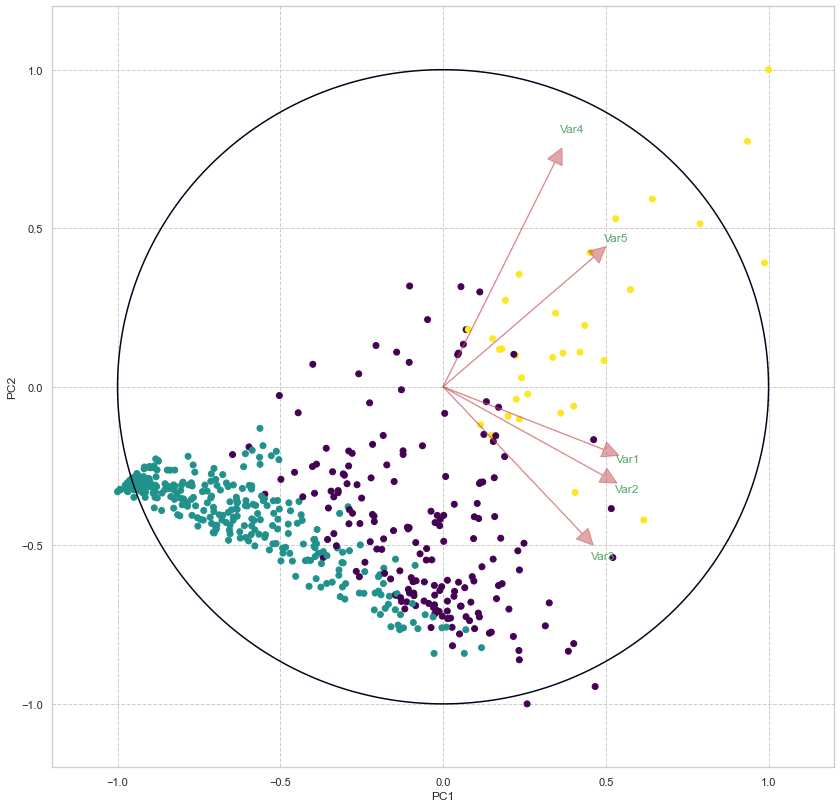

In [77]:
colors = epl_df['Performance_Cat'].astype('category')
y = colors.cat.codes 
biplot(score=data_sortie[:,0:2],
    coeff=np.transpose(mypca.components_[0:2, :]),cat=y,
    cmap="viridis")
plt.show()

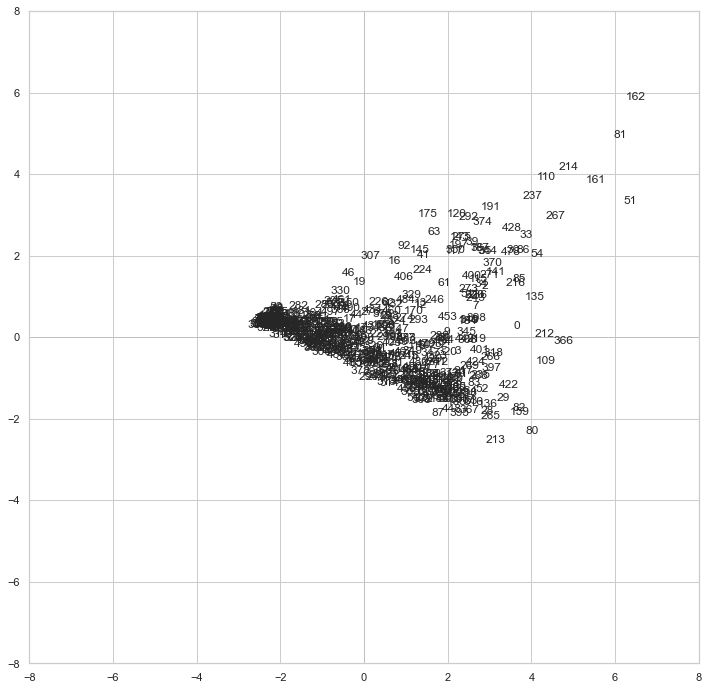

In [78]:
#positionnement des individus dans le premier plan
coord = mypca.fit_transform(X)
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-8,8) #même limites en abscisse
axes.set_ylim(-8,8) #et en ordonnée
#placement des étiquettes des observations
for i in range(530):
    plt.annotate(acp_df.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-8,8],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-8,8],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [52]:
acp_df = epl_df[['Matches','Mins','Passes_Attempted','Goals','PointsOfFantasy']]
#epl_df.iloc[:, 4:6].values
data = acp_df.iloc[:,:].values
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [1]:
x = acp_df.iloc[:,:]
kmeans = KMeans(3)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
identified_clusters
data_with_clusters = epl_df.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.scatter(data_with_clusters['Matches'],data_with_clusters['Age'],c=data_with_clusters['Clusters'],cmap='rainbow')

NameError: name 'acp_df' is not defined